In [1]:
R.home()

[1] "/home/chensijie/software/anaconda3/envs/r40py38/lib/R"

In [2]:
suppressPackageStartupMessages({
    library(Seurat)
    library(dplyr)
    library(SeuratDisk)
    library(ggpubr)
    library(tictoc)
    library(future)
    library(ComplexHeatmap)
    library(circlize)
    library("Nebulosa")
})

o <- function(w,h){
    options(repr.plot.width=w, repr.plot.height=h)
}

In [3]:
load("t.dn.rda")
ls()

[1] "o"    "t.dn"

In [5]:
seu <- t.dn
seu <- FindVariableFeatures(seu, selection.method = "vst", nfeatures=1000,verbose=F)
seu <- ScaleData(seu, features = rownames(seu), verbose=F, block.size=1000, min.cells.to.block=200)
seu <- RunPCA(seu, features = VariableFeatures(object = seu), npcs = 50,verbose=F)
seu <- RunUMAP(seu, dims = 1:50, verbose = F, n.neighbors = 20L, min.dist = 0.2)
seu -> t.dn

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”


In [6]:
t.dn <- FindNeighbors(t.dn, dims = 1:20)
t.dn <- FindClusters( t.dn, resolution = 0.7)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 10803
Number of edges: 387634

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8711
Number of communities: 18
Elapsed time: 1 seconds


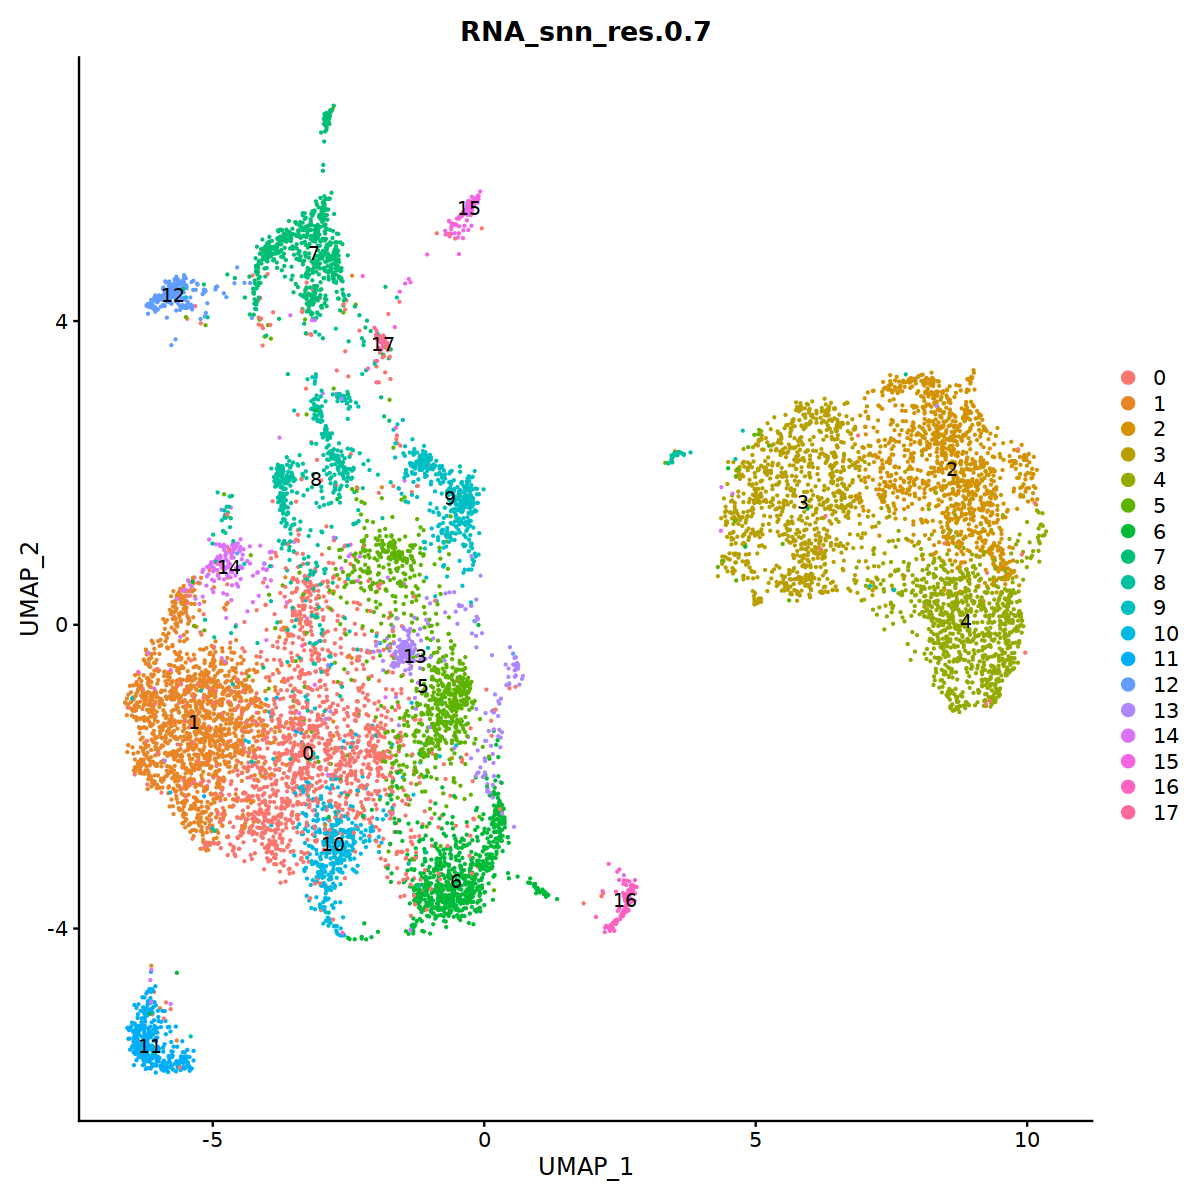

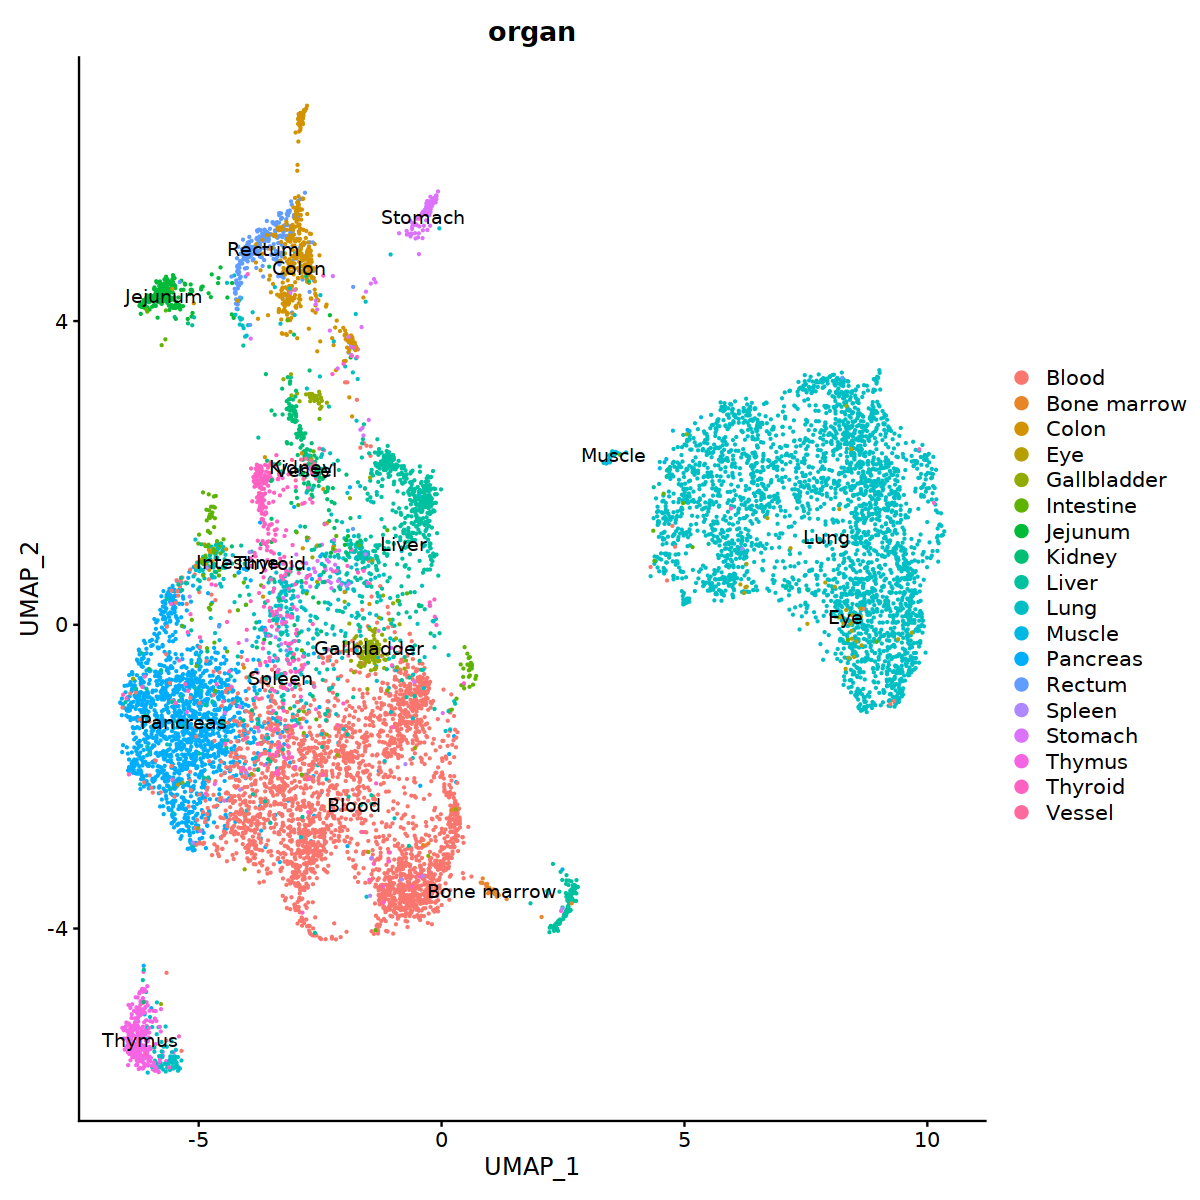

In [23]:
o(10,10)
DimPlot(t.dn, group.by='RNA_snn_res.0.7',label=T)
DimPlot(t.dn, group.by='organ',label=T)

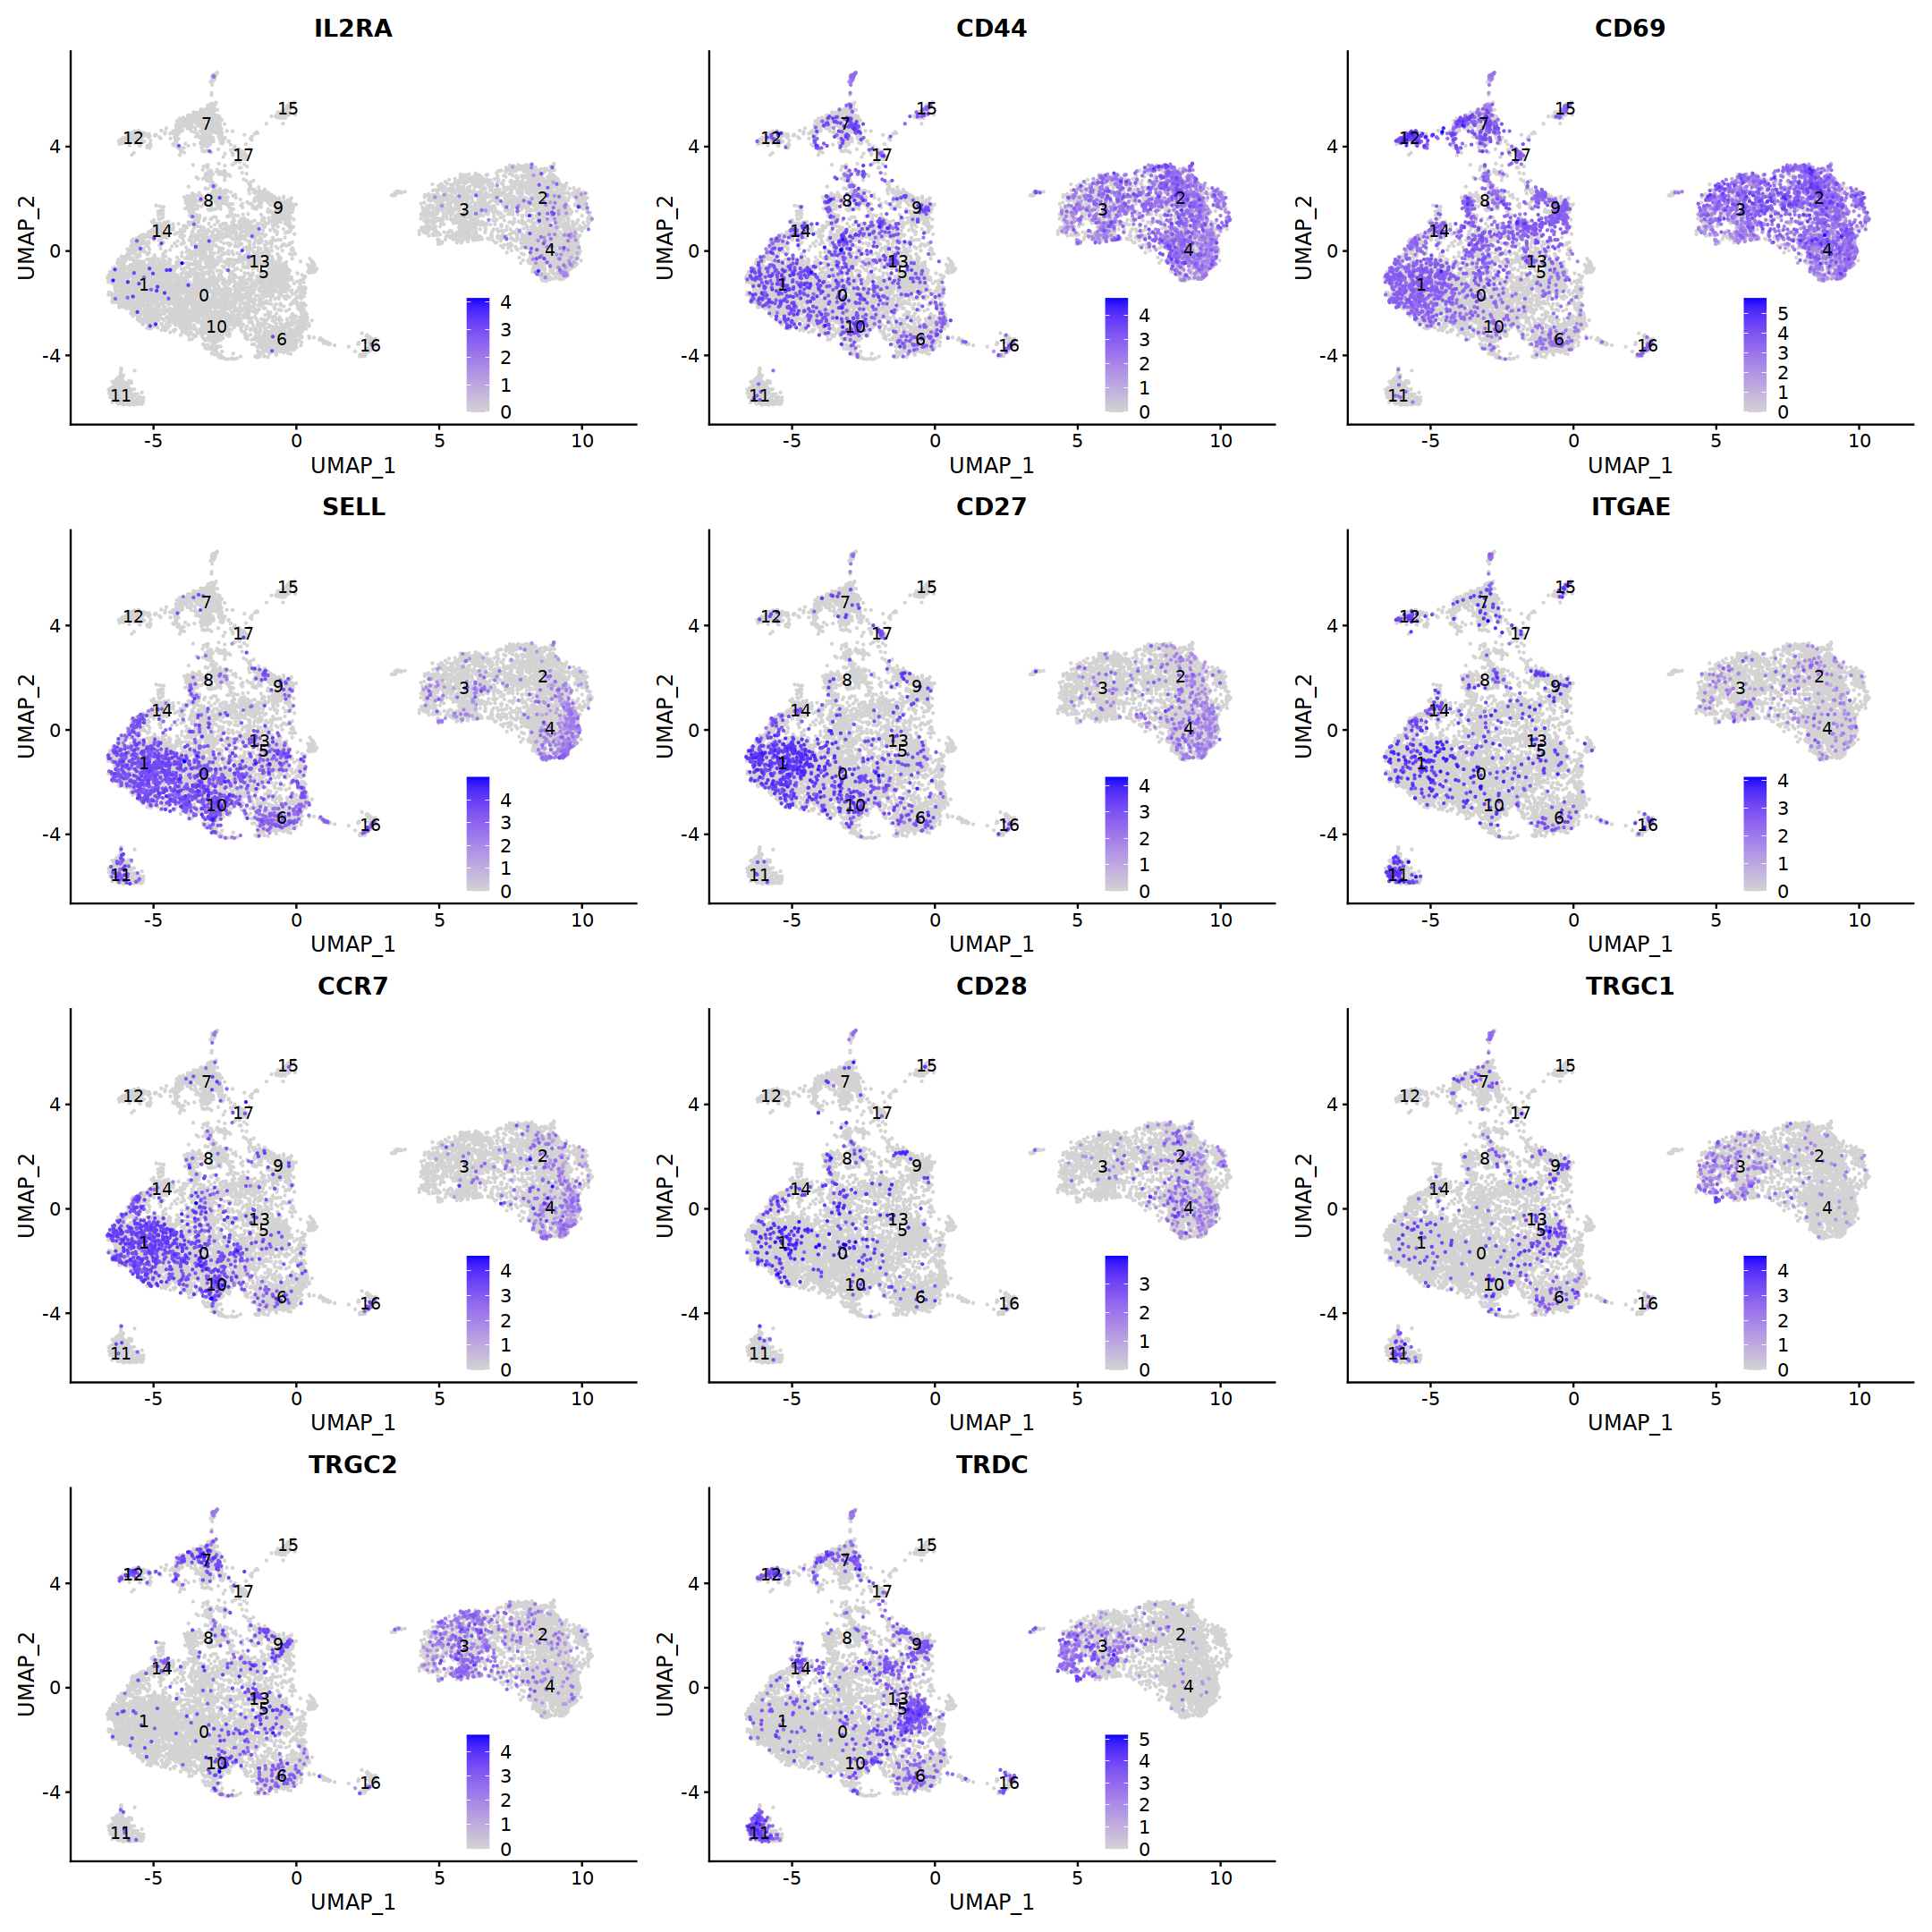

In [21]:
o(6*3, 6*3)
Idents(t.dn)<-"RNA_snn_res.0.7"
FeaturePlot(t.dn,order=T,n=3,  label=T,
            features = c("IL2RA","CD44","CD69","SELL","CD27","ITGAE","CCR7","CD28","TRGC1","TRGC2","TRDC")
           )&theme(legend.position = c(0.7,0.2))

Warning message in FeaturePlot(t.dn, order = T, n = 4, label = T, features = c("CD4", :
“All cells have the same value (0) of CD4.”
Warning message in FeaturePlot(t.dn, order = T, n = 4, label = T, features = c("CD4", :
“All cells have the same value (0) of CD8A.”
Warning message in FeaturePlot(t.dn, order = T, n = 4, label = T, features = c("CD4", :
“All cells have the same value (0) of IL9.”


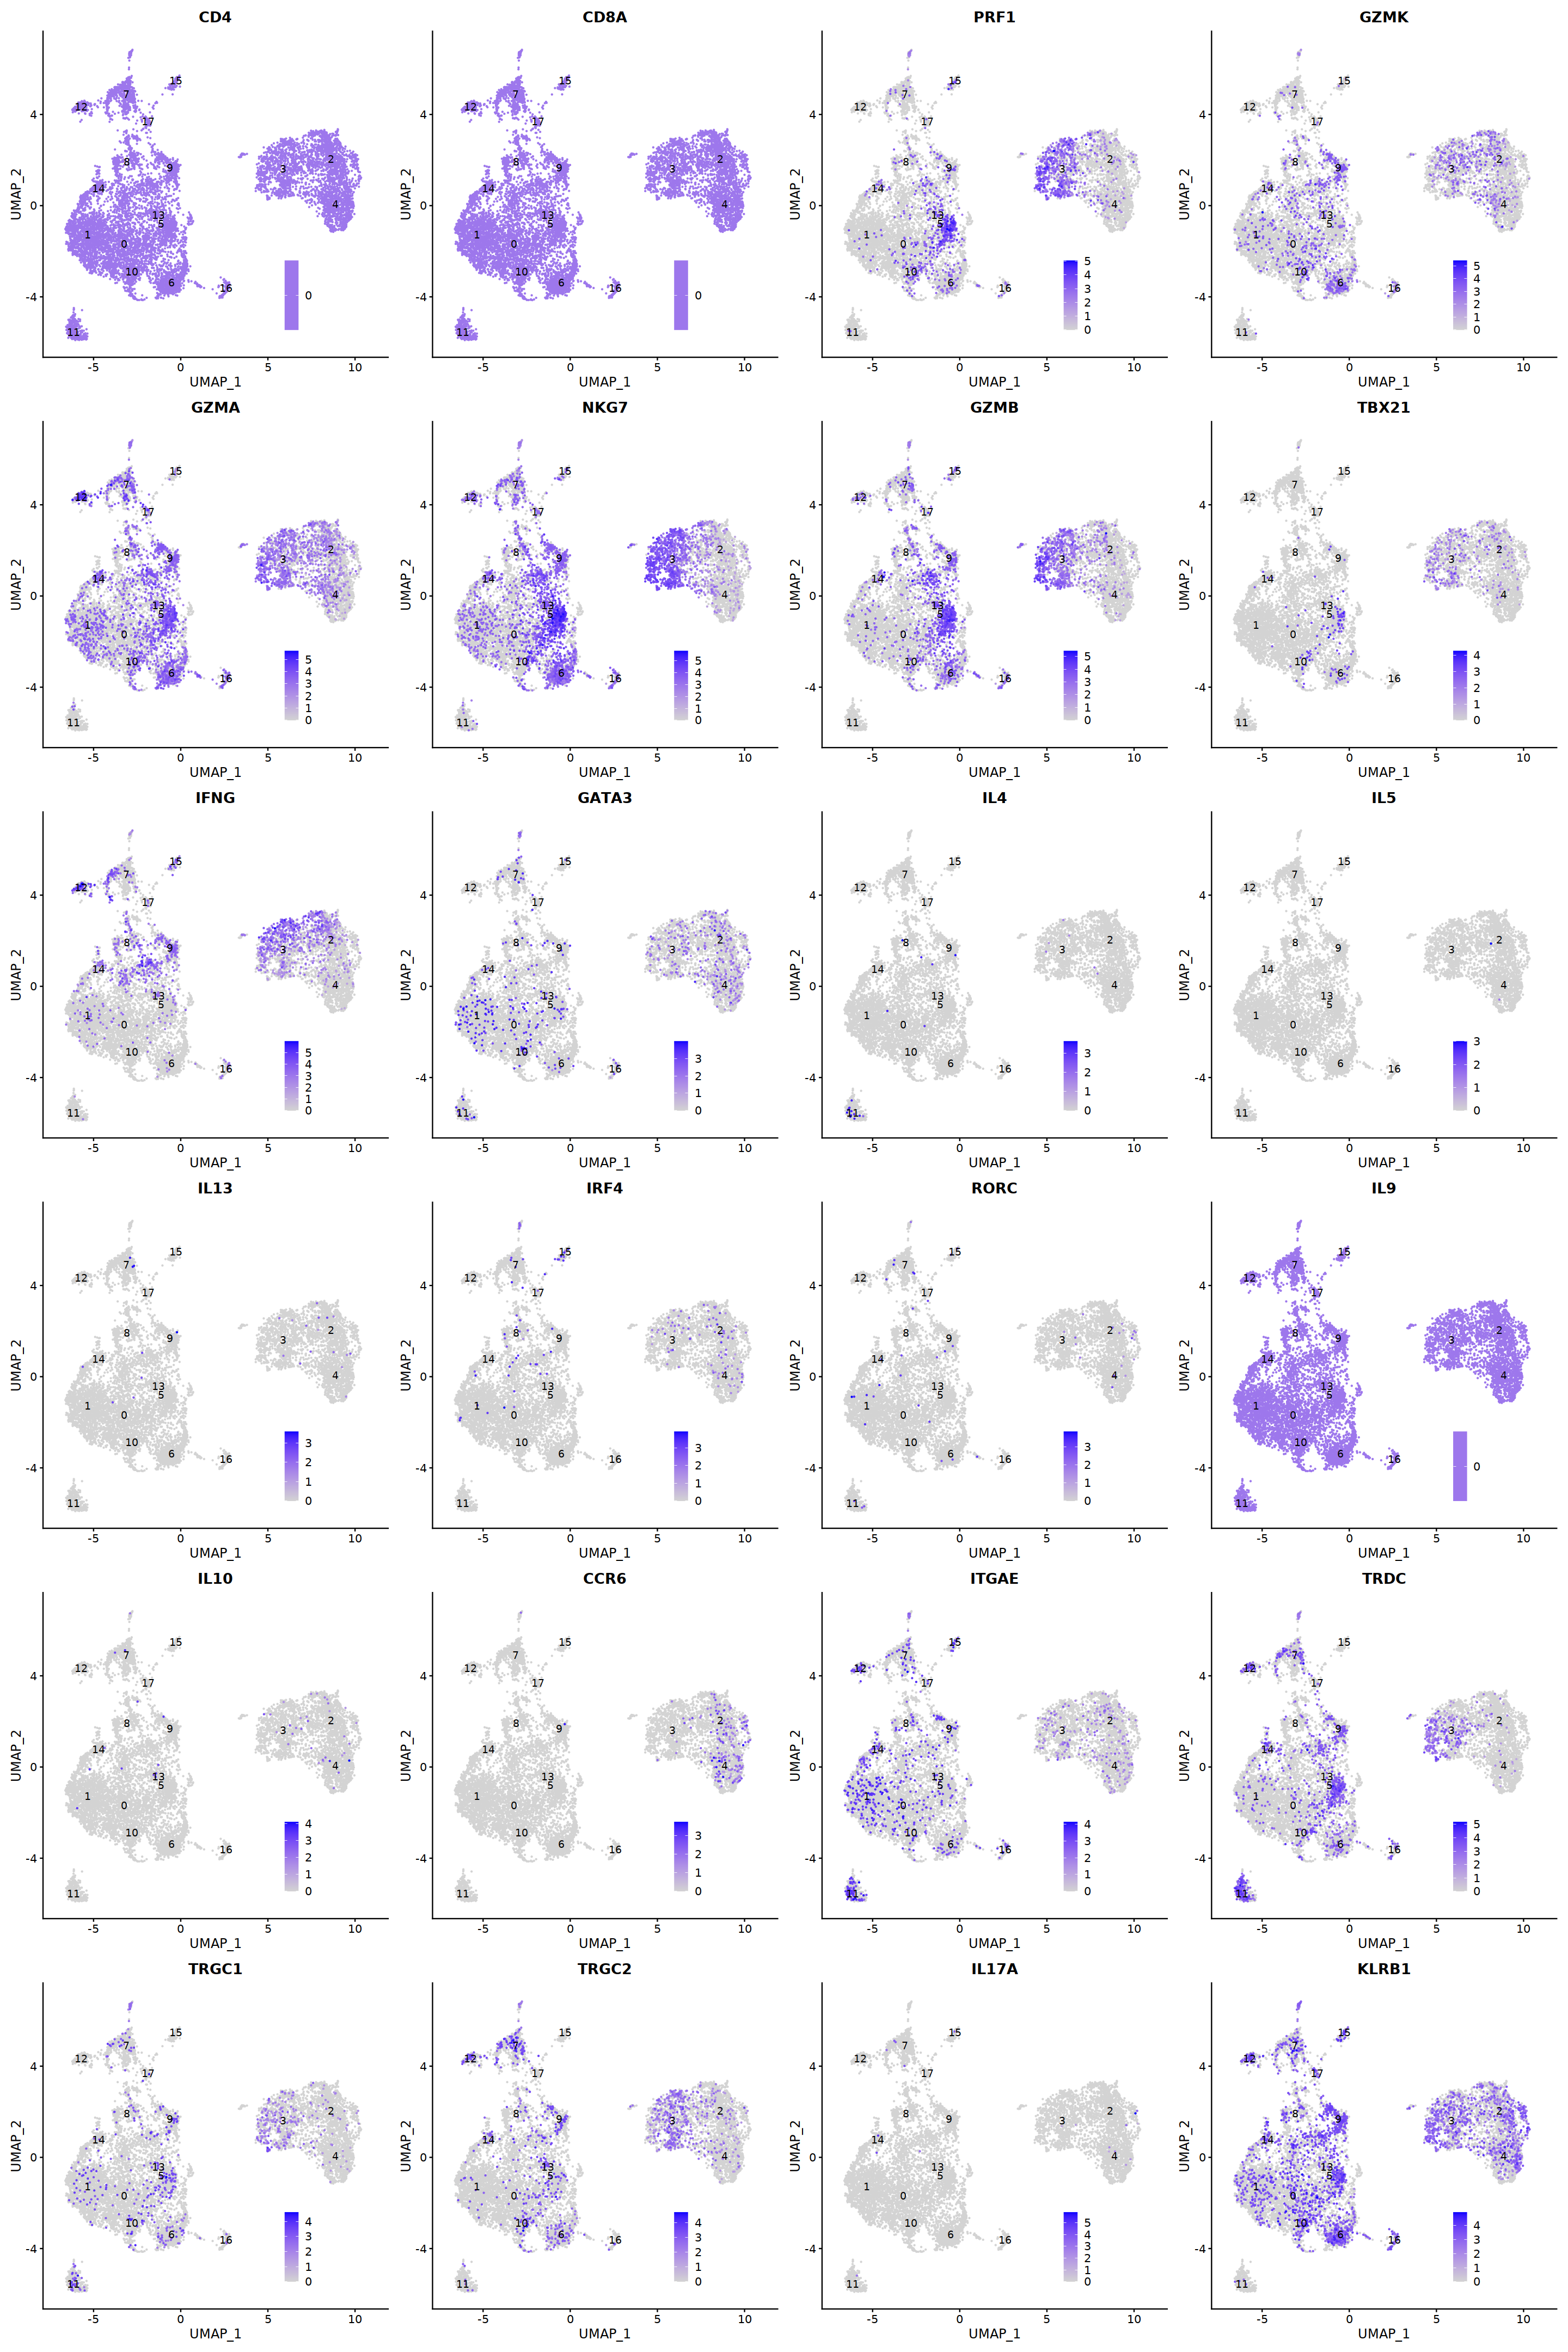

In [22]:
o(6*4, 6*6)
Idents(t.dn)<-"RNA_snn_res.0.7"
FeaturePlot(t.dn,order=T,n=4, label=T,
            features = c("CD4","CD8A","PRF1","GZMK","GZMA","NKG7","GZMB",
                         "TBX21","IFNG","GATA3","IL4","IL5","IL13",
                         "IRF4","RORC","IL9","IL10","CCR6","ITGAE",
                         "TRDC","TRGC1","TRGC2","IL17A","KLRB1"),
           )&theme(legend.position = c(0.7,0.2))

In [27]:
t.dn[["DNsub"]]<-"T"

In [28]:
save(t.dn, file = "t.dn.annot.rda")